## 보스턴 집값 예측 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from torchmetrics.regression import R2Score
from torchinfo import summary

### [1] 데이터 준비

In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE => {DEVICE}')

DEVICE => cpu


In [3]:
DATA_FILE = '../DATA/boston.csv'

boston_df = pd.read_csv(DATA_FILE)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
len(boston_df.columns)

14

### [2] 모델 준비

In [5]:
model = nn.Sequential (nn.Linear(13,40), 
                       nn.ReLU(),
                       nn.Linear(40,30),
                       nn.ReLU(),
                       nn.Linear(30,20),
                       nn.ReLU(),
                       nn.Linear(20,10),
                       nn.ReLU(),
                       nn.Linear(10,1))

In [6]:
for name, param in model.named_parameters():
    print(f'[{name}] {param} \n')

[0.weight] Parameter containing:
tensor([[ 0.2413,  0.0924, -0.1355,  0.2630, -0.2740,  0.0388, -0.0102, -0.0715,
          0.2616,  0.0280, -0.1380,  0.1061, -0.0435],
        [ 0.1388, -0.1698, -0.0509, -0.1979, -0.0951,  0.2255,  0.1675, -0.1277,
          0.0908,  0.2532,  0.1040, -0.1383,  0.0724],
        [-0.1552, -0.0759, -0.0877,  0.1164,  0.1488, -0.2056, -0.1730, -0.1986,
          0.0765,  0.2734,  0.1347, -0.1980,  0.1288],
        [-0.1774,  0.2523,  0.0550, -0.0588, -0.2230,  0.2490,  0.1588,  0.1408,
         -0.1105,  0.2570, -0.1426,  0.0249,  0.2221],
        [-0.0318,  0.1929, -0.1307,  0.1747,  0.2623,  0.2266,  0.1333,  0.0957,
          0.0341, -0.2206,  0.0323,  0.1329, -0.2313],
        [-0.2223,  0.2604, -0.2514, -0.0179, -0.0260,  0.1667, -0.0443,  0.2440,
          0.2057,  0.2441, -0.2245,  0.0908,  0.2181],
        [ 0.2467,  0.1819, -0.0470, -0.0865,  0.1886, -0.0527, -0.1837, -0.2198,
          0.1511, -0.0346, -0.2772, -0.0808,  0.0194],
        [-0.156

In [7]:
print(model)
summary(model, input_size=(13,))

Sequential(
  (0): Linear(in_features=13, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=10, bias=True)
  (7): ReLU()
  (8): Linear(in_features=10, out_features=1, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1]                       --
├─Linear: 1-1                            [40]                      560
├─ReLU: 1-2                              [40]                      --
├─Linear: 1-3                            [30]                      1,230
├─ReLU: 1-4                              [30]                      --
├─Linear: 1-5                            [20]                      620
├─ReLU: 1-6                              [20]                      --
├─Linear: 1-7                            [10]                      210
├─ReLU: 1-8                              [10]                      --
├─Linear: 1-9                            [1]                       11
Total params: 2,631
Trainable params: 2,631
Non-trainable params: 0
Total mult-adds (M): 0.07
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

### [3] 최적화 인스턴스 준비

In [8]:
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

### [4] 학습

In [9]:
feature_df = boston_df[boston_df.columns[:-1]]
target_df = boston_df[['MEDV']]

print(feature_df.shape, target_df.shape)

(506, 13) (506, 1)


In [10]:
from sklearn.model_selection import train_test_split

# train, test 쪼개기 
x_train, x_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2)

# train, valid 쪼개기 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f'[Feature] Train {x_train.shape}, Test {x_test.shape}, Val {x_val.shape}')
print(f'[Target] Train {y_train.shape}, Test {y_test.shape}, Val {y_val.shape}')

[Feature] Train (323, 13), Test (102, 13), Val (81, 13)
[Target] Train (323, 1), Test (102, 1), Val (81, 1)


In [11]:
EPOCH = 500
BATCH_SIZE = 17
BATCH_CNT = x_train.shape[0] // BATCH_SIZE

print(f'EPOCH : {EPOCH}, BATCH_SIZE : {BATCH_SIZE}, BATCH_CNT : {BATCH_CNT}')


EPOCH : 500, BATCH_SIZE : 17, BATCH_CNT : 19


In [12]:
def testing(test_df, target_df):
    test_ts = torch.FloatTensor(test_df.values).to(DEVICE)
    target_ts = torch.FloatTensor(target_df.values).to(DEVICE)

    with torch.no_grad():
        # 학습 진행 
        pre_y = model(test_ts)
        print(f'{pre_y.shape}')

        # 오차 계산 
        loss = F.mse_loss(pre_y, target_ts)

        # 성능 평가 
        r2 = R2Score()(pre_y, target_ts)

        print(f'LOSS : {loss}, R2 : {R2Score()(pre_y, target_ts)}')

    return loss, r2

In [13]:
def training(feature_ts, target_ts, val_ts, val_target_ts):
    loss_history = [[],[]]
    r2_history = [[],[]]

    for epoch in range(EPOCH):

        bs_loss = 0
        bs_r2 = 0

        for i in range(BATCH_CNT):
            start = i * BATCH_SIZE
            end = start + BATCH_SIZE

            BSX_train = torch.FloatTensor(x_train[start:end].values).to(DEVICE)
            BSY_train = torch.FloatTensor(y_train[start:end].values).to(DEVICE)

            # 학습 진행 
            pre_y = model(BSX_train)

            # 오차계산 - 손실함수 
            loss = F.mse_loss(pre_y, BSY_train)
            bs_loss += loss.item()
            bs_r2 += (R2Score()(pre_y, BSY_train)).item()

            # 최적화 
            adam_optim.zero_grad()
            loss.backward()
            adam_optim.step()

        # 검증 
        val_loss, val_r2 = testing(val_ts, val_target_ts)
        loss_history[1].append(val_loss)
        r2_history[1].append(val_r2)

        # 에포크 단위 손실과 성능 지표 
        loss_history[0].append(bs_loss/BATCH_CNT)
        r2_history[0].append(bs_r2/BATCH_CNT)

        print(f'[{epoch}/{EPOCH}] \n Train_Loss : {loss_history[0][-1]}, R2 : {r2_history[0][-1]}')
        print(f'Val_Loss : {loss_history[1][-1]}, R2 : {r2_history[1][-1]}')

    return loss_history, r2_history

In [14]:
loss, r2 = training(x_train, y_train, x_val, y_val)

torch.Size([81, 1])
LOSS : 74.6963882446289, R2 : -0.2423645257949829
[0/500] 
 Train_Loss : 332.9881760446649, R2 : -3.2895616481178687
Val_Loss : 74.6963882446289, R2 : -0.2423645257949829
torch.Size([81, 1])
LOSS : 56.68684387207031, R2 : 0.05717366933822632
[1/500] 
 Train_Loss : 70.54672582525956, R2 : 0.1293219578893561
Val_Loss : 56.68684387207031, R2 : 0.05717366933822632
torch.Size([81, 1])
LOSS : 41.133392333984375, R2 : 0.31586164236068726
[2/500] 
 Train_Loss : 99.7174687636526, R2 : -0.41222151643351507
Val_Loss : 41.133392333984375, R2 : 0.31586164236068726
torch.Size([81, 1])
LOSS : 67.66918182373047, R2 : -0.1254866123199463
[3/500] 
 Train_Loss : 58.86774083187706, R2 : 0.28677485804808767
Val_Loss : 67.66918182373047, R2 : -0.1254866123199463
torch.Size([81, 1])
LOSS : 40.10142517089844, R2 : 0.3330255150794983
[4/500] 
 Train_Loss : 43.10747186761154, R2 : 0.4442305909959893
Val_Loss : 40.10142517089844, R2 : 0.3330255150794983
torch.Size([81, 1])
LOSS : 42.462192535

Text(0.5, 1.0, 'R2')

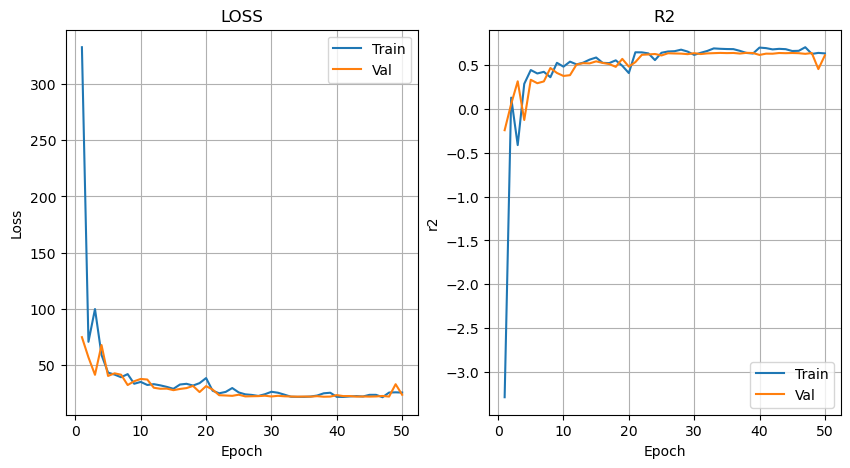

In [19]:
# 학습 후 loss 시각화 

THRESHOLD = 50
fg, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].plot(range(1,THRESHOLD+1) ,loss[0][:THRESHOLD], label = 'Train')
axes[0].plot(range(1,THRESHOLD+1), loss[1][:THRESHOLD], label = 'Val')
axes[0].grid()
axes[0].legend()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('LOSS')

axes[1].plot(range(1,THRESHOLD+1) ,r2[0][:THRESHOLD], label = 'Train')
axes[1].plot(range(1,THRESHOLD+1), r2[1][:THRESHOLD], label = 'Val')
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('r2')
axes[1].set_title('R2')

In [22]:
print(min(loss[0][:THRESHOLD]))
print(max(r2[0][:THRESHOLD]))

21.168984362953587
0.7047122967870612
